# Preps

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from time import time

In [3]:
#Loading the mnist dataset

mnist = keras.datasets.mnist
(_,_) , (test_images,test_labels) = mnist.load_data()

# Loading the given weights
w = np.load("weights.npy", allow_pickle=True)

In [4]:
#Reshaping the images to be able to use them
x = test_images.reshape(-1,784)/255

In [5]:
"""
Creating the activation function we are going to use
Also creating a function which calculate the cross-entropy
"""
def softmax(element):
    res = np.exp(element)
    return res/sum(res)

def relu(x):
    return (abs(x)+x)/2

def cross_entropy(y_true,y):
    return (y_true*np.log(y)).sum() /len(y)

# Task 1-2

In [6]:
def pred_nn(weights,x_test):
    """
    This function will do some predictions using only the numpy library
    To be sure on the computation time I've hardcoded the weights' indexes
    As far as I know it is faster than initializing a for loop
    """
    l1 = relu(np.dot(x_test,weights[0]) + weights[1])
    
    l2 = relu( np.dot(l1,weights[2]) + weights[3])
    
    l3 = relu(np.dot(l2,weights[4]) + weights[5])
    
    l4 = np.dot(l3,weights[6]) + weights[7]
    
    return  softmax(l4)

# Task 3

In [7]:
model = keras.Sequential([
keras.layers.Dense(units = 750,input_dim = 784,activation = 'relu', name ='relu1',weights = [w[0],w[1] ]),
keras.layers.Dense(500,activation = 'relu', name ='relu2',weights = [w[2],w[3] ]),
keras.layers.Dense(500,activation = 'relu', name ='relu3',weights = [w[4],w[5] ]),
keras.layers.Dense(10,activation=tf.nn.softmax,name='softmax1',weights = [w[6],w[7] ])
])

In [8]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(loss =loss_fn )

# Task 4-5

In [9]:
# Making predictions with the model
result = pred_nn(w,x)
categories = np.argmax(result, axis = 1)

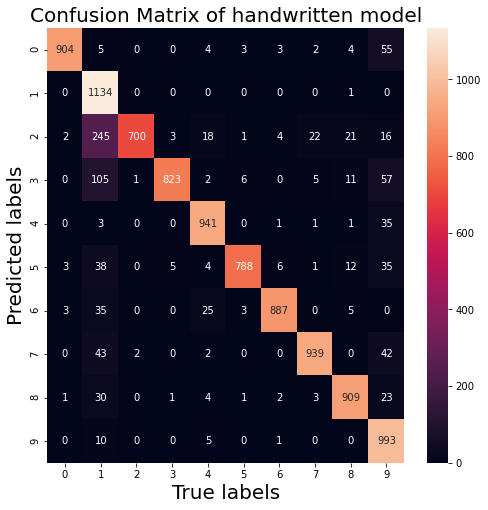

In [10]:
# Showing the confusion Matrix
plt.figure(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(test_labels,categories), fmt = ".0f",annot=True)
ax.set_xlabel('True labels', size = 20)
ax.set_ylabel('Predicted labels', size = 20)
ax.set_title('Confusion Matrix of handwritten model', size = 20)
None

Most of the mistakes are made, when the true labels are 1, but it predicts many different values.

In [11]:
#Calculating accuracy
acc_1 = np.sum(test_labels == categories)/100
print("The accuracy of the handwritten model is " +str(acc_1) + " %")

The accuracy of the handwritten model is 90.18 %


In [12]:
cr = tf.keras.utils.to_categorical(test_labels,num_classes = 10)

In [13]:
print('The cross entropy of the numpy model is ' + str(np.round(cross_entropy(cr,result),3) ))

The cross entropy of the numpy model is -10.562


In [14]:
# Creating predictions
predictions = model.predict(x)

In [15]:
pred = np.argmax(predictions, axis = 1)

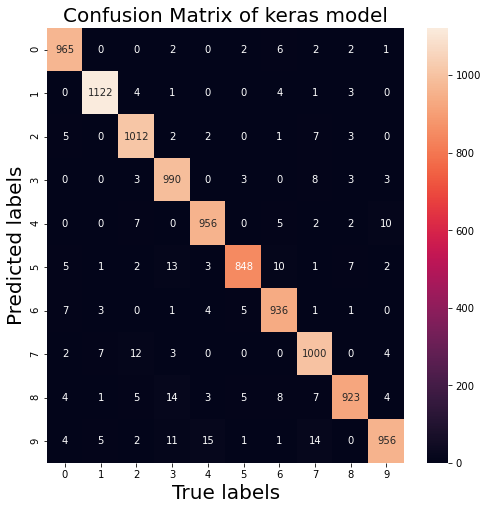

In [16]:
plt.figure(figsize=(8,8))
ax1 = sns.heatmap(confusion_matrix(test_labels,pred), fmt = ".0f",annot=True)
ax1.set_xlabel('True labels', size = 20)
ax1.set_ylabel('Predicted labels', size = 20)
ax1.set_title('Confusion Matrix of keras model', size = 20)
None

In [17]:
acc_2 = np.sum(test_labels == pred)/100
print("The accuracy of the Keras model is " +str(acc_2) + " %")

The accuracy of the Keras model is 97.08 %


In [18]:
cr2 = model.evaluate(x,test_labels)
print(' \n The cross entropy of the keras model is {cr2}:'.format(cr2 = np.round(cr2,3))  )

313/313 [==============================] - 1s 2ms/step - loss: 0.0959
 
 The cross entropy of the keras model is 0.096:
